In [1]:
import cv2
import numpy as np
import PIL.Image as Image
from IPython.display import display
import math
import matplotlib.pyplot as plt


In [2]:
flower = cv2.imread("./image/rose.jpg")
flower_gray = cv2.cvtColor(flower, cv2.COLOR_BGR2GRAY)
flower_gray


array([[126, 124, 122, ..., 122, 129, 137],
       [123, 122, 122, ..., 122, 131, 138],
       [119, 118, 117, ..., 122, 131, 139],
       ...,
       [ 65,  64,  64, ...,  39,  39,  38],
       [ 66,  65,  64, ...,  36,  38,  37],
       [ 70,  67,  68, ...,  37,  36,  36]], dtype=uint8)

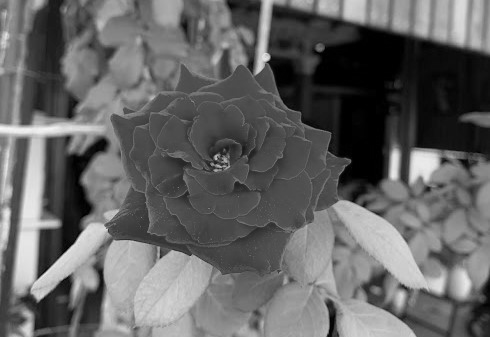

In [3]:
display(Image.fromarray(flower_gray))


Đảo ảnh


In [4]:
reverse_arr = np.array(flower_gray)
for i in range(flower_gray.shape[0]):
    for j in range(flower_gray.shape[1]):
        reverse_arr[i, j] = 255 - flower_gray[i, j]
reverse_arr


array([[129, 131, 133, ..., 133, 126, 118],
       [132, 133, 133, ..., 133, 124, 117],
       [136, 137, 138, ..., 133, 124, 116],
       ...,
       [190, 191, 191, ..., 216, 216, 217],
       [189, 190, 191, ..., 219, 217, 218],
       [185, 188, 187, ..., 218, 219, 219]], dtype=uint8)

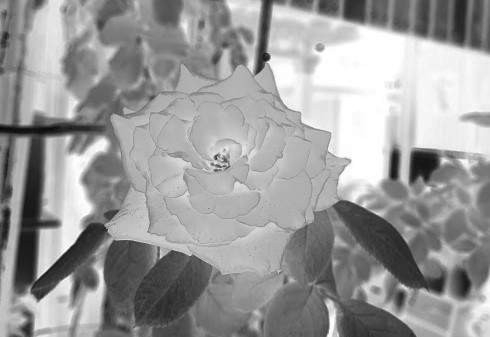

In [5]:
display(Image.fromarray(reverse_arr))


Cắt ngưỡng


In [28]:
threshold = 100
threshold_arr = np.array(flower_gray)
for i in range(flower_gray.shape[0]):
    for j in range(flower_gray.shape[1]):
        r = flower_gray[i, j]
        threshold_arr[i, j] = 255 if r >= threshold else 0
threshold_arr


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

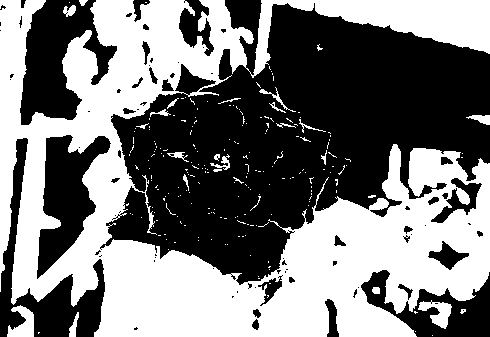

In [29]:
display(Image.fromarray(threshold_arr))


Biến đổi logarit


In [36]:
log_arr = np.array(flower_gray)
c = 12
for i in range(flower_gray.shape[0]):
    for j in range(flower_gray.shape[1]):
        log_arr[i, j] = c * math.log(1 + flower_gray[i, j])
log_arr


array([[58, 57, 57, ..., 57, 58, 59],
       [57, 57, 57, ..., 57, 58, 59],
       [57, 57, 57, ..., 57, 58, 59],
       ...,
       [50, 50, 50, ..., 44, 44, 43],
       [50, 50, 50, ..., 43, 43, 43],
       [51, 50, 50, ..., 43, 43, 43]], dtype=uint8)

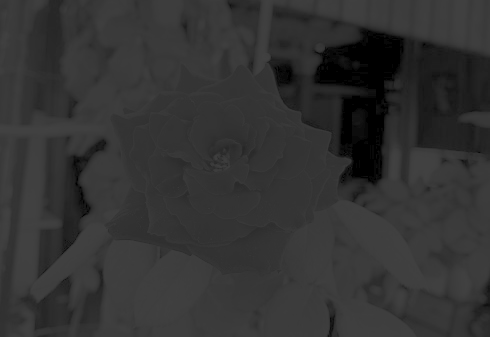

In [37]:
display(Image.fromarray(log_arr))


Biến đổi hàm mũ


In [10]:
gamma_arr = np.array(flower_gray)
c = 2
gamma = 0.6
for i in range(flower_gray.shape[0]):
    for j in range(flower_gray.shape[1]):
        gamma_arr[i, j] = c * math.pow(flower_gray[i, j], gamma)
gamma_arr


array([[36, 36, 35, ..., 35, 36, 38],
       [35, 35, 35, ..., 35, 37, 38],
       [35, 35, 34, ..., 35, 37, 38],
       ...,
       [24, 24, 24, ..., 18, 18, 17],
       [24, 24, 24, ..., 17, 17, 17],
       [25, 24, 25, ..., 17, 17, 17]], dtype=uint8)

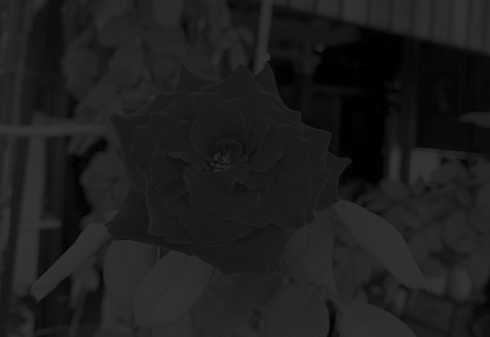

In [11]:
display(Image.fromarray(gamma_arr))


Cắt lát mức xám


In [12]:
grey_arr = np.array(flower_gray)
A = 100
B = 150
for i in range(flower_gray.shape[0]):
    for j in range(flower_gray.shape[1]):
        t = flower_gray[i, j]
        if (t < A) or (t > B):
            grey_arr[i, j] = 0
grey_arr


array([[126, 124, 122, ..., 122, 129, 137],
       [123, 122, 122, ..., 122, 131, 138],
       [119, 118, 117, ..., 122, 131, 139],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

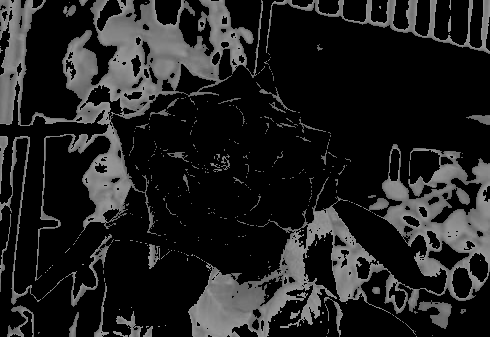

In [13]:
display(Image.fromarray(grey_arr))


Cắt lát mặt bit


In [14]:
binary_repr_v = np.vectorize(np.binary_repr)
bin_arr = binary_repr_v(flower_gray, 256)


In [15]:
n = 6
bin_arr_res = np.array(flower_gray)
for i in range(flower_gray.shape[0]):
    for j in range(flower_gray.shape[1]):
        t = bin_arr[i, j][255-n+1]
        bin_arr_res[i, j] = ((int)(t)) * (math.pow(2, n-1))
bin_arr_res


array([[32, 32, 32, ..., 32,  0,  0],
       [32, 32, 32, ..., 32,  0,  0],
       [32, 32, 32, ..., 32,  0,  0],
       ...,
       [ 0,  0,  0, ..., 32, 32, 32],
       [ 0,  0,  0, ..., 32, 32, 32],
       [ 0,  0,  0, ..., 32, 32, 32]], dtype=uint8)

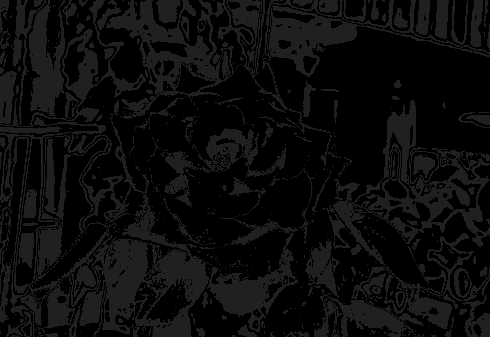

In [16]:
display(Image.fromarray(bin_arr_res))


Cân bằng histogram


In [17]:
def compute_hist(img):
    hist = np.zeros((256,), np.uint16)
    h, w = img.shape[:2]
    for i in range(h):
        for j in range(w):
            hist[img[i][j]] += 1
    return hist


def equal_hist(hist):
    cumulator = np.zeros_like(hist, np.float64)
    for i in range(len(cumulator)):
        cumulator[i] = hist[:i].sum()
    # new_hist = (cumulator - cumulator.min())/(cumulator.max() - cumulator.min()) * 255
    # new_hist = np.uint8(new_hist)
    new_hist = np.array(hist)
    MN = np.sum(hist)
    for i in range(len(hist)):
        s = 255*cumulator[i]/MN
        new_hist[i] = round(s, 0)
    return new_hist


In [18]:
hist = compute_hist(flower_gray).ravel()
new_hist = equal_hist(hist)
h, w = flower_gray.shape[:2]
hist_img = np.array(flower_gray)
for i in range(h):
    for j in range(w):
        hist_img[i, j] = new_hist[flower_gray[i, j]]


In [19]:
def show_hist(img):
    h, w = img.shape[:2]
    hist = compute_hist(img)
    prk = np.array(hist)
    prk = prk/(h*w)
    index = np.arange(0, 256, 1)
    plt.plot(index, prk)
    plt.show()


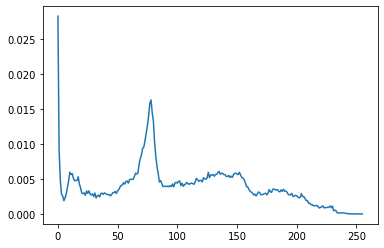

In [20]:
show_hist(flower_gray)


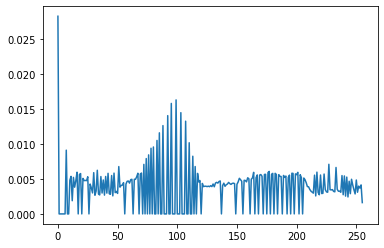

In [21]:
show_hist(hist_img)


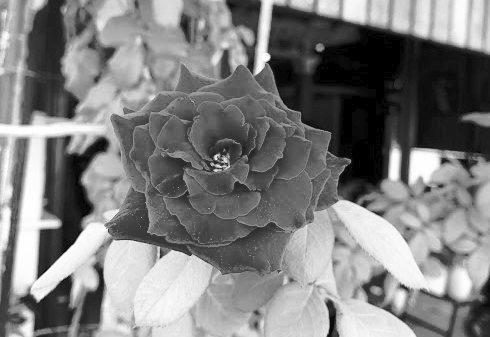

In [22]:
display(Image.fromarray(hist_img))


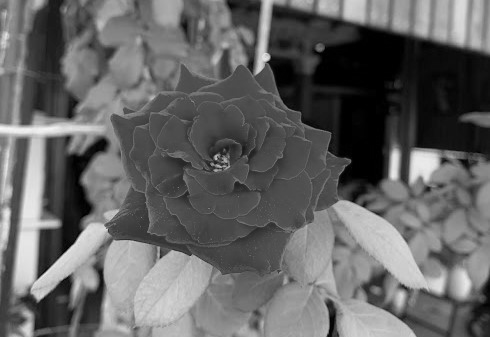

In [23]:
display(Image.fromarray(flower_gray))


In [24]:
hist = compute_hist(gamma_arr).ravel()
new_hist = equal_hist(hist)
h, w = gamma_arr.shape[:2]
hist_img = np.array(gamma_arr)
for i in range(h):
    for j in range(w):
        hist_img[i, j] = new_hist[gamma_arr[i, j]]


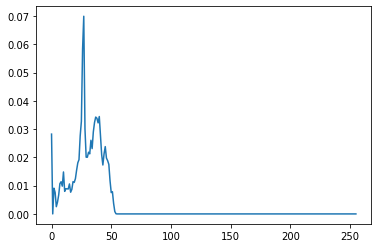

In [25]:
show_hist(gamma_arr)


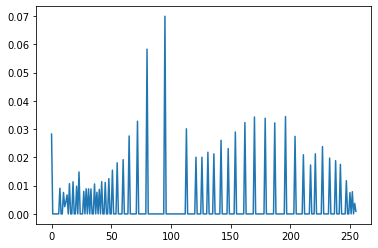

In [26]:
show_hist(hist_img)


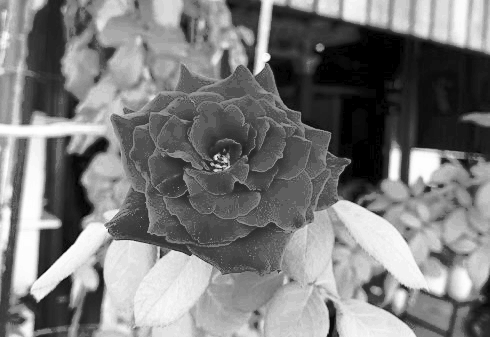

In [27]:
display(Image.fromarray(hist_img))
